# Jacobi RMA

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read all the data files
onenodes_1win_get_1200 = pd.read_csv('1nodes-1win-get-1200.csv')
onenodes_1win_get_12k = pd.read_csv('1nodes-1win-get-12000.csv')
onenodes_1win_put_1200 = pd.read_csv('1nodes-1win-put-1200.csv')
onenodes_1win_put_12k = pd.read_csv('1nodes-1win-put-12000.csv')
onenodes_2win_get_1200 = pd.read_csv('1nodes-2win-get-1200.csv')
onenodes_2win_get_12k = pd.read_csv('1nodes-2win-get-12000.csv')
onenodes_2win_put_1200 = pd.read_csv('1nodes-2win-put-1200.csv')
onenodes_2win_put_12k = pd.read_csv('1nodes-2win-put-12000.csv')
onenode_nowin_1200 = pd.read_csv('1nodes-two-sided-comm-none-1200.csv')
onenode_nowin_12k = pd.read_csv('1nodes-two-sided-comm-none-12000.csv')

twonodes_1win_get_1200 = pd.read_csv('2nodes-1win-get-1200.csv')
twonodes_1win_get_12k = pd.read_csv('2nodes-1win-get-12000.csv')
twonodes_1win_put_1200 = pd.read_csv('2nodes-1win-put-1200.csv')
twonodes_1win_put_12k = pd.read_csv('2nodes-1win-put-12000.csv')
twonodes_2win_get_1200 = pd.read_csv('2nodes-2win-get-1200.csv')
twonodes_2win_get_12k = pd.read_csv('2nodes-2win-get-12000.csv')
twonodes_2win_put_1200 = pd.read_csv('2nodes-2win-put-1200.csv')
twonodes_2win_put_12k = pd.read_csv('2nodes-2win-put-12000.csv')
twonode_nowin_1200 = pd.read_csv('2nodes-two-sided-comm-none-1200.csv')
twonode_nowin_12k = pd.read_csv('2nodes-two-sided-comm-none-12000.csv')

fournodes_1win_get_1200 = pd.read_csv('4nodes-1win-get-1200.csv')
fournodes_1win_get_12k = pd.read_csv('4nodes-1win-get-12000.csv')
fournodes_1win_put_1200 = pd.read_csv('4nodes-1win-put-1200.csv')
fournodes_1win_put_12k = pd.read_csv('4nodes-1win-put-12000.csv')
fournodes_2win_get_1200 = pd.read_csv('4nodes-2win-get-1200.csv')
fournodes_2win_get_12k = pd.read_csv('4nodes-2win-get-12000.csv')
fournodes_2win_put_1200 = pd.read_csv('4nodes-2win-put-1200.csv')
fournodes_2win_put_12k = pd.read_csv('4nodes-2win-put-12000.csv')
fournode_nowin_1200 = pd.read_csv('4nodes-two-sided-comm-none-1200.csv')
fournode_nowin_12k = pd.read_csv('4nodes-two-sided-comm-none-12000.csv')

eightnodes_1win_get_1200 = pd.read_csv('8nodes-1win-get-1200.csv')
eightnodes_1win_get_12k = pd.read_csv('8nodes-1win-get-12000.csv')
eightnodes_1win_put_1200 = pd.read_csv('8nodes-1win-put-1200.csv')
eightnodes_1win_put_12k = pd.read_csv('8nodes-1win-put-12000.csv')
eightnodes_2win_get_1200 = pd.read_csv('8nodes-2win-get-1200.csv')
eightnodes_2win_get_12k = pd.read_csv('8nodes-2win-get-12000.csv')
eightnodes_2win_put_1200 = pd.read_csv('8nodes-2win-put-1200.csv')
eightnodes_2win_put_12k = pd.read_csv('8nodes-2win-put-12000.csv')
eightnode_nowin_1200 = pd.read_csv('8nodes-two-sided-comm-none-1200.csv')
eightnode_nowin_12k = pd.read_csv('8nodes-two-sided-comm-none-12000.csv')

sixteennodes_1win_get_1200 = pd.read_csv('16nodes-1win-get-1200.csv')
sixteennodes_1win_get_12k = pd.read_csv('16nodes-1win-get-12000.csv')
sixteennodes_1win_put_1200 = pd.read_csv('16nodes-1win-put-1200.csv')
sixteennodes_1win_put_12k = pd.read_csv('16nodes-1win-put-12000.csv')
sixteennodes_2win_get_1200 = pd.read_csv('16nodes-2win-get-1200.csv')
sixteennodes_2win_get_12k = pd.read_csv('16nodes-2win-get-12000.csv')
sixteennodes_2win_put_1200 = pd.read_csv('16nodes-2win-put-1200.csv')
sixteennodes_2win_put_12k = pd.read_csv('16nodes-2win-put-12000.csv')
sixteennode_nowin_1200 = pd.read_csv('16nodes-two-sided-comm-none-1200.csv')
sixteennode_nowin_12k = pd.read_csv('16nodes-two-sided-comm-none-12000.csv')

In [3]:
# Create a unique data frame using more columns
onenodes_1win_get_1200['nodes'] = 1
onenodes_1win_get_1200['windows'] = 1
onenodes_1win_get_1200['operation'] = 'get'
onenodes_1win_get_1200['size'] = 1200
onenodes_1win_get_12k['nodes'] = 1
onenodes_1win_get_12k['windows'] = 1
onenodes_1win_get_12k['operation'] = 'get'
onenodes_1win_get_12k['size'] = 12000
onenodes_1win_put_1200['nodes'] = 1
onenodes_1win_put_1200['windows'] = 1
onenodes_1win_put_1200['operation'] = 'put'
onenodes_1win_put_1200['size'] = 1200
onenodes_1win_put_12k['nodes'] = 1
onenodes_1win_put_12k['windows'] = 1
onenodes_1win_put_12k['operation'] = 'put'
onenodes_1win_put_12k['size'] = 12000
onenodes_2win_get_1200['nodes'] = 1
onenodes_2win_get_1200['windows'] = 2
onenodes_2win_get_1200['operation'] = 'get'
onenodes_2win_get_1200['size'] = 1200
onenodes_2win_get_12k['nodes'] = 1
onenodes_2win_get_12k['windows'] = 2
onenodes_2win_get_12k['operation'] = 'get'
onenodes_2win_get_12k['size'] = 12000
onenodes_2win_put_1200['nodes'] = 1
onenodes_2win_put_1200['windows'] = 2
onenodes_2win_put_1200['operation'] = 'put'
onenodes_2win_put_1200['size'] = 1200
onenodes_2win_put_12k['nodes'] = 1
onenodes_2win_put_12k['windows'] = 2
onenodes_2win_put_12k['operation'] = 'put'
onenodes_2win_put_12k['size'] = 12000
onenode_nowin_1200['nodes'] = 1
onenode_nowin_1200['windows'] = 0
onenode_nowin_1200['operation'] = 'none'
onenode_nowin_1200['size'] = 1200
onenode_nowin_12k['nodes'] = 1
onenode_nowin_12k['windows'] = 0
onenode_nowin_12k['operation'] = 'none'
onenode_nowin_12k['size'] = 12000

twonodes_1win_get_1200['nodes'] = 2
twonodes_1win_get_1200['windows'] = 1
twonodes_1win_get_1200['operation'] = 'get'
twonodes_1win_get_1200['size'] = 1200
twonodes_1win_get_12k['nodes'] = 2
twonodes_1win_get_12k['windows'] = 1
twonodes_1win_get_12k['operation'] = 'get'
twonodes_1win_get_12k['size'] = 12000
twonodes_1win_put_1200['nodes'] = 2
twonodes_1win_put_1200['windows'] = 1
twonodes_1win_put_1200['operation'] = 'put'
twonodes_1win_put_1200['size'] = 1200
twonodes_1win_put_12k['nodes'] = 2
twonodes_1win_put_12k['windows'] = 1
twonodes_1win_put_12k['operation'] = 'put'
twonodes_1win_put_12k['size'] = 12000
twonodes_2win_get_1200['nodes'] = 2
twonodes_2win_get_1200['windows'] = 2
twonodes_2win_get_1200['operation'] = 'get'
twonodes_2win_get_1200['size'] = 1200
twonodes_2win_get_12k['nodes'] = 2
twonodes_2win_get_12k['windows'] = 2
twonodes_2win_get_12k['operation'] = 'get'
twonodes_2win_get_12k['size'] = 12000
twonodes_2win_put_1200['nodes'] = 2
twonodes_2win_put_1200['windows'] = 2
twonodes_2win_put_1200['operation'] = 'put'
twonodes_2win_put_1200['size'] = 1200
twonodes_2win_put_12k['nodes'] = 2
twonodes_2win_put_12k['windows'] = 2
twonodes_2win_put_12k['operation'] = 'put'
twonodes_2win_put_12k['size'] = 12000
twonode_nowin_1200['nodes'] = 2
twonode_nowin_1200['windows'] = 0
twonode_nowin_1200['operation'] = 'none'
twonode_nowin_1200['size'] = 1200
twonode_nowin_12k['nodes'] = 2
twonode_nowin_12k['windows'] = 0
twonode_nowin_12k['operation'] = 'none'
twonode_nowin_12k['size'] = 12000

# 4 nodes
fournodes_1win_get_1200['nodes'] = 4
fournodes_1win_get_1200['windows'] = 1
fournodes_1win_get_1200['operation'] = 'get'
fournodes_1win_get_1200['size'] = 1200
fournodes_1win_get_12k['nodes'] = 4
fournodes_1win_get_12k['windows'] = 1
fournodes_1win_get_12k['operation'] = 'get'
fournodes_1win_get_12k['size'] = 12000
fournodes_1win_put_1200['nodes'] = 4
fournodes_1win_put_1200['windows'] = 1
fournodes_1win_put_1200['operation'] = 'put'
fournodes_1win_put_1200['size'] = 1200
fournodes_1win_put_12k['nodes'] = 4
fournodes_1win_put_12k['windows'] = 1
fournodes_1win_put_12k['operation'] = 'put'
fournodes_1win_put_12k['size'] = 12000
fournodes_2win_get_1200['nodes'] = 4
fournodes_2win_get_1200['windows'] = 2
fournodes_2win_get_1200['operation'] = 'get'
fournodes_2win_get_1200['size'] = 1200
fournodes_2win_get_12k['nodes'] = 4
fournodes_2win_get_12k['windows'] = 2
fournodes_2win_get_12k['operation'] = 'get'
fournodes_2win_get_12k['size'] = 12000
fournodes_2win_put_1200['nodes'] = 4
fournodes_2win_put_1200['windows'] = 2
fournodes_2win_put_1200['operation'] = 'put'
fournodes_2win_put_1200['size'] = 1200
fournodes_2win_put_12k['nodes'] = 4
fournodes_2win_put_12k['windows'] = 2
fournodes_2win_put_12k['operation'] = 'put'
fournodes_2win_put_12k['size'] = 12000
fournode_nowin_1200['nodes'] = 4
fournode_nowin_1200['windows'] = 0
fournode_nowin_1200['operation'] = 'none'
fournode_nowin_1200['size'] = 1200
fournode_nowin_12k['nodes'] = 4
fournode_nowin_12k['windows'] = 0
fournode_nowin_12k['operation'] = 'none'
fournode_nowin_12k['size'] = 12000

# 8 nodes
eightnodes_1win_get_1200['nodes'] = 8
eightnodes_1win_get_1200['windows'] = 1
eightnodes_1win_get_1200['operation'] = 'get'
eightnodes_1win_get_1200['size'] = 1200
eightnodes_1win_get_12k['nodes'] = 8
eightnodes_1win_get_12k['windows'] = 1
eightnodes_1win_get_12k['operation'] = 'get'
eightnodes_1win_get_12k['size'] = 12000
eightnodes_1win_put_1200['nodes'] = 8
eightnodes_1win_put_1200['windows'] = 1
eightnodes_1win_put_1200['operation'] = 'put'
eightnodes_1win_put_1200['size'] = 1200
eightnodes_1win_put_12k['nodes'] = 8
eightnodes_1win_put_12k['windows'] = 1
eightnodes_1win_put_12k['operation'] = 'put'
eightnodes_1win_put_12k['size'] = 12000
eightnodes_2win_get_1200['nodes'] = 8
eightnodes_2win_get_1200['windows'] = 2
eightnodes_2win_get_1200['operation'] = 'get'
eightnodes_2win_get_1200['size'] = 1200
eightnodes_2win_get_12k['nodes'] = 8
eightnodes_2win_get_12k['windows'] = 2
eightnodes_2win_get_12k['operation'] = 'get'
eightnodes_2win_get_12k['size'] = 12000
eightnodes_2win_put_1200['nodes'] = 8
eightnodes_2win_put_1200['windows'] = 2
eightnodes_2win_put_1200['operation'] = 'put'
eightnodes_2win_put_1200['size'] = 1200
eightnodes_2win_put_12k['nodes'] = 8
eightnodes_2win_put_12k['windows'] = 2
eightnodes_2win_put_12k['operation'] = 'put'
eightnodes_2win_put_12k['size'] = 12000
eightnode_nowin_1200['nodes'] = 8
eightnode_nowin_1200['windows'] = 0
eightnode_nowin_1200['operation'] = 'none'
eightnode_nowin_1200['size'] = 1200
eightnode_nowin_12k['nodes'] = 8
eightnode_nowin_12k['windows'] = 0
eightnode_nowin_12k['operation'] = 'none'
eightnode_nowin_12k['size'] = 12000

# 16 nodes
sixteennodes_1win_get_1200['nodes'] = 16
sixteennodes_1win_get_1200['windows'] = 1
sixteennodes_1win_get_1200['operation'] = 'get'
sixteennodes_1win_get_1200['size'] = 1200
sixteennodes_1win_get_12k['nodes'] = 16
sixteennodes_1win_get_12k['windows'] = 1
sixteennodes_1win_get_12k['operation'] = 'get'
sixteennodes_1win_get_12k['size'] = 12000
sixteennodes_1win_put_1200['nodes'] = 16
sixteennodes_1win_put_1200['windows'] = 1
sixteennodes_1win_put_1200['operation'] = 'put'
sixteennodes_1win_put_1200['size'] = 1200
sixteennodes_1win_put_12k['nodes'] = 16
sixteennodes_1win_put_12k['windows'] = 1
sixteennodes_1win_put_12k['operation'] = 'put'
sixteennodes_1win_put_12k['size'] = 12000
sixteennodes_2win_get_1200['nodes'] = 16
sixteennodes_2win_get_1200['windows'] = 2
sixteennodes_2win_get_1200['operation'] = 'get'
sixteennodes_2win_get_1200['size'] = 1200
sixteennodes_2win_get_12k['nodes'] = 16
sixteennodes_2win_get_12k['windows'] = 2
sixteennodes_2win_get_12k['operation'] = 'get'
sixteennodes_2win_get_12k['size'] = 12000
sixteennodes_2win_put_1200['nodes'] = 16
sixteennodes_2win_put_1200['windows'] = 2
sixteennodes_2win_put_1200['operation'] = 'put'
sixteennodes_2win_put_1200['size'] = 1200
sixteennodes_2win_put_12k['nodes'] = 16
sixteennodes_2win_put_12k['windows'] = 2
sixteennodes_2win_put_12k['operation'] = 'put'
sixteennodes_2win_put_12k['size'] = 12000
sixteennode_nowin_1200['nodes'] = 16
sixteennode_nowin_1200['windows'] = 0
sixteennode_nowin_1200['operation'] = 'none'
sixteennode_nowin_1200['size'] = 1200
sixteennode_nowin_12k['nodes'] = 16
sixteennode_nowin_12k['windows'] = 0
sixteennode_nowin_12k['operation'] = 'none'
sixteennode_nowin_12k['size'] = 12000

In [4]:
# Concatenate all the dataframes
all_data = pd.concat([onenodes_1win_get_1200, onenodes_1win_get_12k, onenodes_1win_put_1200, onenodes_1win_put_12k, onenodes_2win_get_1200, onenodes_2win_get_12k, onenodes_2win_put_1200, onenodes_2win_put_12k, onenode_nowin_1200, onenode_nowin_12k, twonodes_1win_get_1200, twonodes_1win_get_12k, twonodes_1win_put_1200, twonodes_1win_put_12k, twonodes_2win_get_1200, twonodes_2win_get_12k, twonodes_2win_put_1200, twonodes_2win_put_12k, twonode_nowin_1200, twonode_nowin_12k, fournodes_1win_get_1200, fournodes_1win_get_12k, fournodes_1win_put_1200, fournodes_1win_put_12k, fournodes_2win_get_1200, fournodes_2win_get_12k, fournodes_2win_put_1200, fournodes_2win_put_12k, fournode_nowin_1200, fournode_nowin_12k, eightnodes_1win_get_1200, eightnodes_1win_get_12k, eightnodes_1win_put_1200, eightnodes_1win_put_12k, eightnodes_2win_get_1200, eightnodes_2win_get_12k, eightnodes_2win_put_1200, eightnodes_2win_put_12k, eightnode_nowin_1200, eightnode_nowin_12k, sixteennodes_1win_get_1200, sixteennodes_1win_get_12k, sixteennodes_1win_put_1200, sixteennodes_1win_put_12k, sixteennodes_2win_get_1200, sixteennodes_2win_get_12k, sixteennodes_2win_put_1200, sixteennodes_2win_put_12k, sixteennode_nowin_1200, sixteennode_nowin_12k])

all_data

,time,rank,size,what,nodes,windows,operation
0,0.004610,0,1200,matrix-initialization,1,1,get
1,0.103713,0,1200,mpi-comm,1,1,get
2,0.000952,0,1200,computation,1,1,get
3,0.005049,0,1200,matrix-initialization,1,1,get
4,0.080276,0,1200,mpi-comm,1,1,get
...,...,...,...,...,...,...,...
475,0.086152,3,12000,mpi-comm,16,0,none
476,0.006311,3,12000,computation,16,0,none
477,0.008423,6,12000,matrix-initialization,16,0,none
478,0.071857,6,12000,mpi-comm,16,0,none


In [5]:
# Aggregate the data per 'size', 'what', 'nodes', 'windows' and 'operation'

all_data_grouped = all_data.groupby(['size', 'what', 'nodes', 'windows', 'operation']).agg({'time': ['mean']}).reset_index()
# rename the mean column
all_data_grouped.columns = ['size', 'what', 'nodes', 'windows', 'operation', 'time']




In [6]:
data = all_data_grouped

## Plots

In [7]:
# fist plot: scalability: get vs put, 1 window
data_1win = data[data['windows'] == 1]
data_1win = data_1win[data_1win['operation'] != 'none']
data_1win = data_1win[data_1win['size'] == 1200]
print(data_1win)


    size                   what  nodes  windows operation      time
1   1200            computation      1        1       get  0.000890
2   1200            computation      1        1       put  0.000919
6   1200            computation      2        1       get  0.000683
7   1200            computation      2        1       put  0.000704
11  1200            computation      4        1       get  0.000714
12  1200            computation      4        1       put  0.000809
16  1200            computation      8        1       get  0.000820
17  1200            computation      8        1       put  0.000833
21  1200            computation     16        1       get  0.000836
22  1200            computation     16        1       put  0.000925
26  1200  matrix-initialization      1        1       get  0.004641
27  1200  matrix-initialization      1        1       put  0.004667
31  1200  matrix-initialization      2        1       get  0.003768
32  1200  matrix-initialization      2        1 

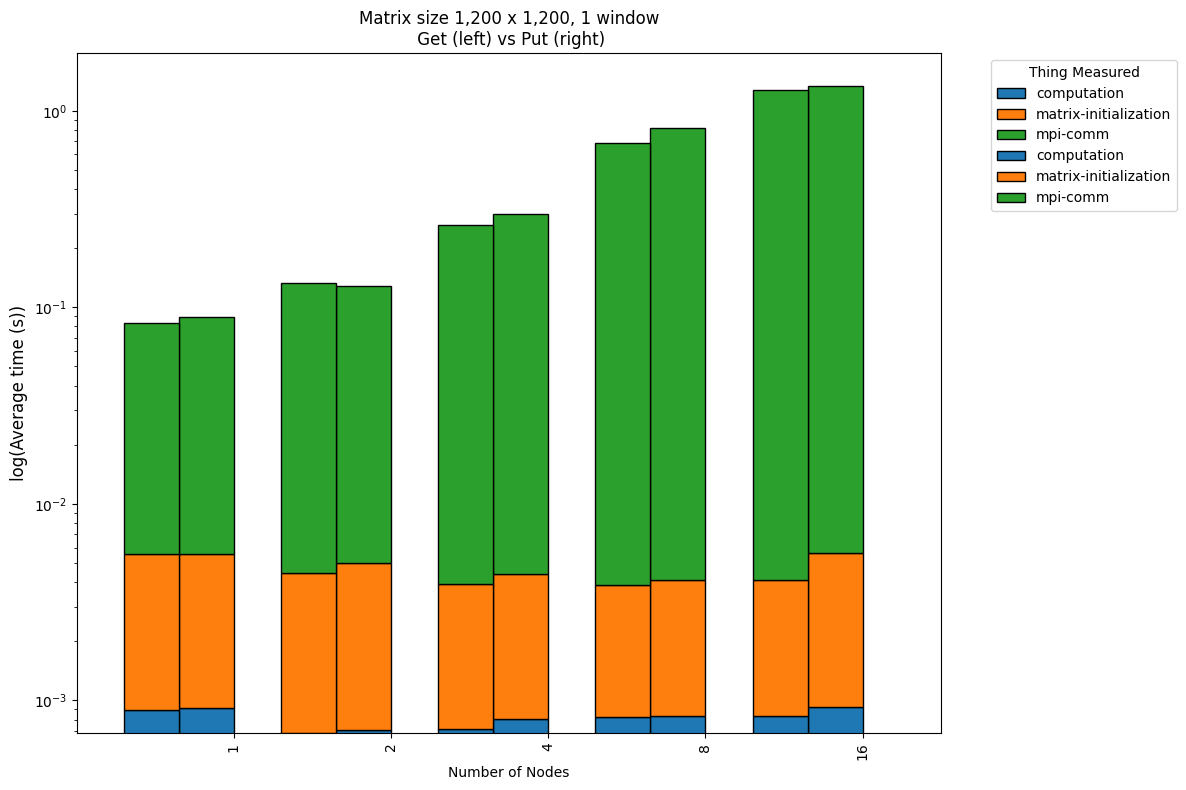

In [8]:
# Pivot the data to have 'put' and 'get' as separate columns for each 'what' and 'nodes'
put_df = data_1win[data_1win['operation'] == 'put']
get_df = data_1win[data_1win['operation'] == 'get']

pivot_put = put_df.pivot(index='nodes', columns='what', values='time')
pivot_get = get_df.pivot(index='nodes', columns='what', values='time')

# Make 2 stackbar plots
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
pivot_put.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=1, edgecolor='black')
pivot_get.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=2, edgecolor='black')

# put y on log scale: 
plt.yscale('log')

plt.xlim(-1, 4.5)
plt.xlabel('Number of Nodes')
plt.ylabel('log(Average time (s))', fontsize=12)
plt.title('Matrix size 1,200 x 1,200, 1 window\n Get (left) vs Put (right)')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
# same as above but for 12k
data_1win = data[data['windows'] == 1]
data_1win = data_1win[data_1win['operation'] != 'none']
data_1win = data_1win[data_1win['size'] == 12000] 

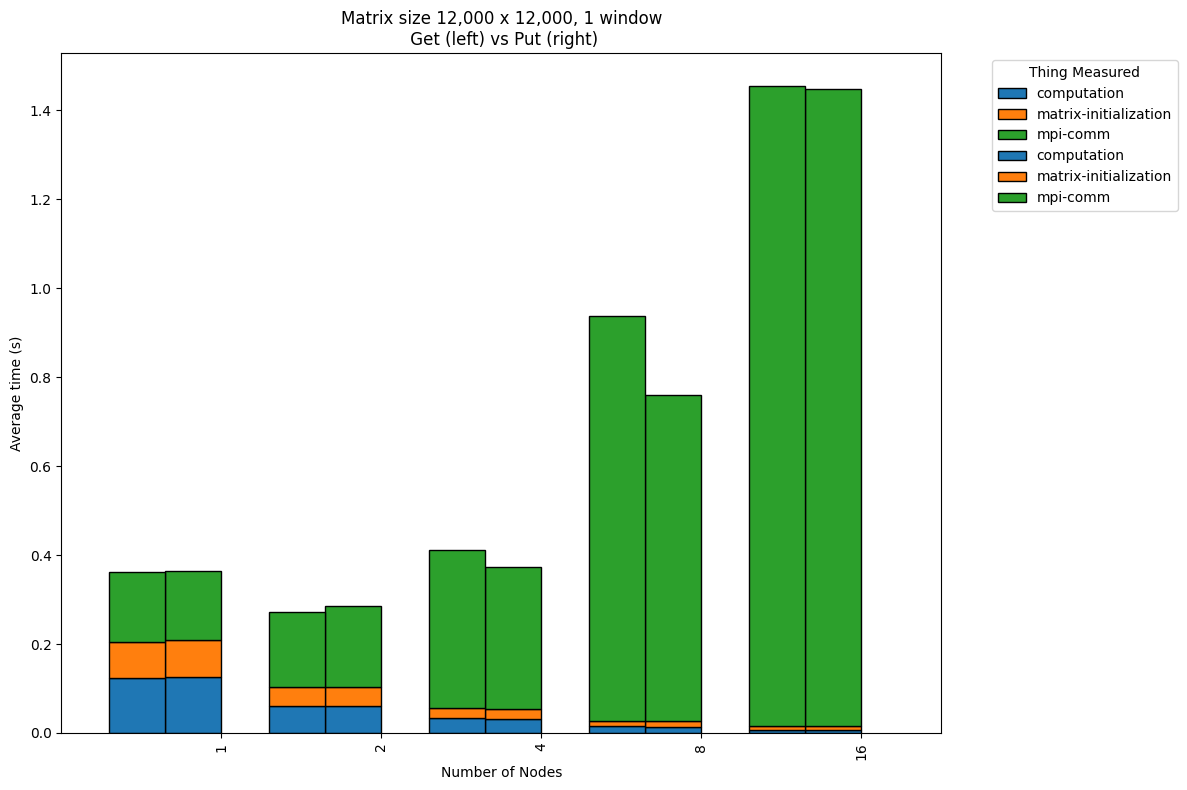

In [19]:
put_df = data_1win[data_1win['operation'] == 'put']
get_df = data_1win[data_1win['operation'] == 'get']

pivot_put = put_df.pivot(index='nodes', columns='what', values='time')
pivot_get = get_df.pivot(index='nodes', columns='what', values='time')

# Make 2 stackbar plots
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# make the edge black
pivot_put.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=1, edgecolor='black')
pivot_get.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=2, edgecolor='black')

plt.xlim(-1, 4.5)
plt.xlabel('Number of Nodes')
plt.ylabel('Average time (s)')
plt.title('Matrix size 12,000 x 12,000, 1 window\n Get (left) vs Put (right)')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# Now let's do it for the 2 windows
data_2win = data[data['windows'] == 2]
data_2win = data_2win[data_2win['operation'] != 'none']
data_2win = data_2win[data_2win['size'] == 1200]

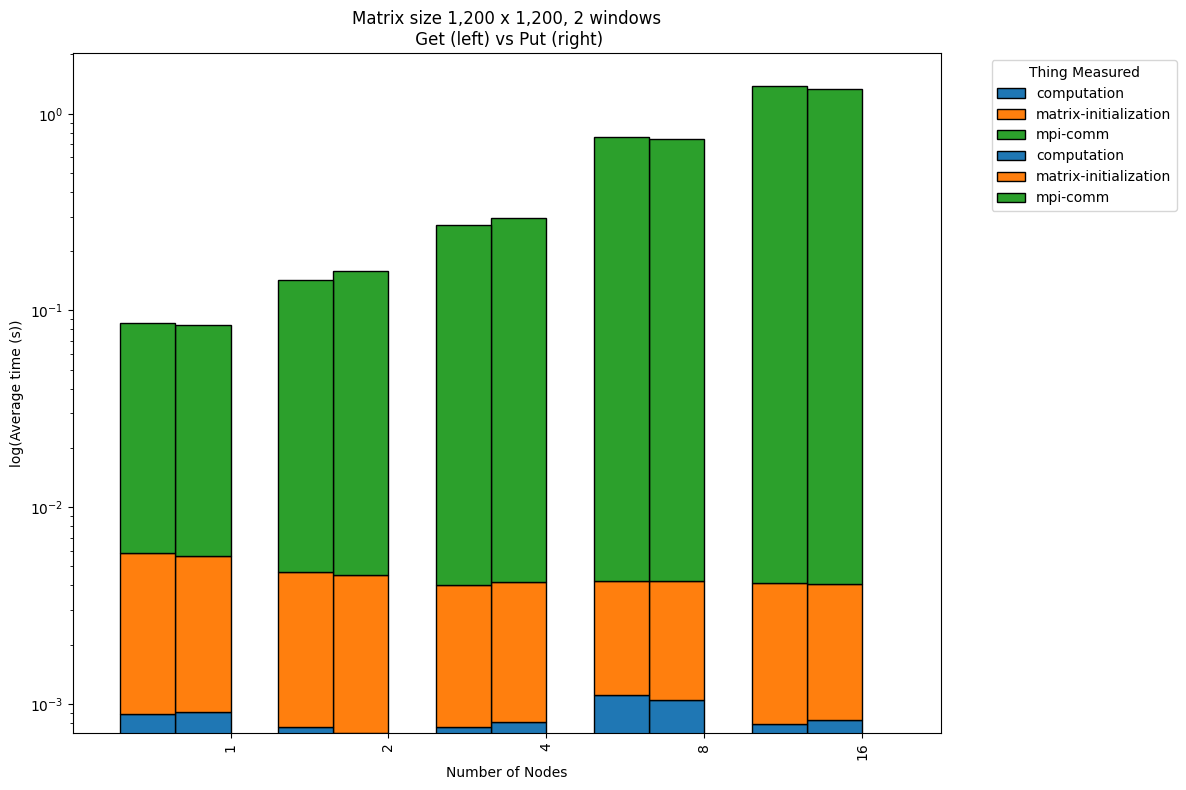

In [12]:
put_df = data_2win[data_2win['operation'] == 'put']
get_df = data_2win[data_2win['operation'] == 'get']

pivot_get
pivot_put = put_df.pivot(index='nodes', columns='what', values='time')
pivot_get = get_df.pivot(index='nodes', columns='what', values='time')

# Make 2 stackbar plots
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.yscale('log')
# make the edge black
pivot_put.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=1, edgecolor='black')
pivot_get.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=2, edgecolor='black')

plt.xlim(-1, 4.5)
plt.xlabel('Number of Nodes')
plt.ylabel('log(Average time (s))')
plt.title('Matrix size 1,200 x 1,200, 2 windows\n Get (left) vs Put (right)')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
# 12 k

data_2win = data[data['windows'] == 2]
data_2win = data_2win[data_2win['operation'] != 'none']
data_2win = data_2win[data_2win['size'] == 12000]


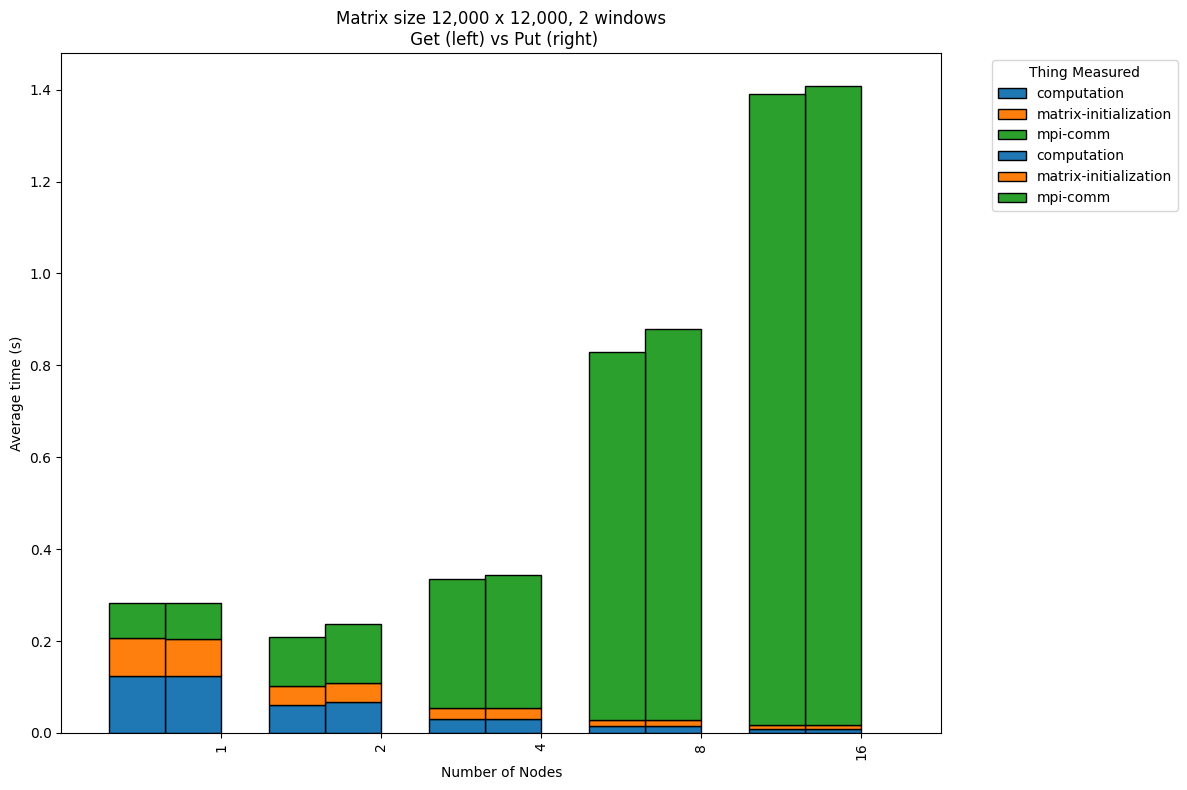

In [14]:
put_df = data_2win[data_2win['operation'] == 'put']
get_df = data_2win[data_2win['operation'] == 'get']

pivot_put = put_df.pivot(index='nodes', columns='what', values='time')
pivot_get = get_df.pivot(index='nodes', columns='what', values='time')

# Make 2 stackbar plots

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# make the edge black
pivot_put.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=1, edgecolor='black')
pivot_get.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=2, edgecolor='black')

plt.xlim(-1, 4.5)
plt.xlabel('Number of Nodes')
plt.ylabel('Average time (s)')
plt.title('Matrix size 12,000 x 12,000, 2 windows\n Get (left) vs Put (right)')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [15]:
# Now let' take as a reference the put case. 
# compare 1 widnow, 2 window and 0 window

data_put = data[data['operation'] == 'put']
data_put = data_put[data_put['size'] == 1200]

df_1_win = data_put[data_put['windows'] == 1]
df_2_win = data_put[data_put['windows'] == 2]
df_0_win = data[data['windows'] == 0]
df_0_win = df_0_win[df_0_win['size'] == 1200]

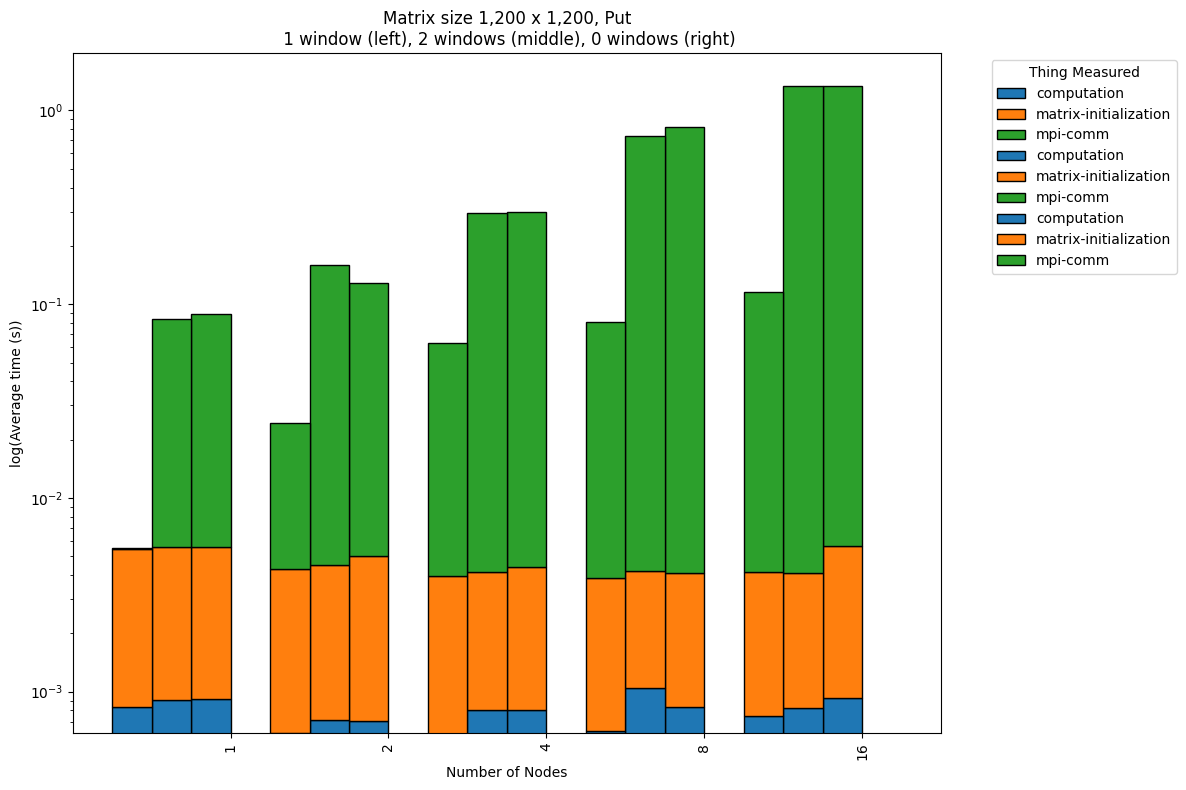

In [16]:
pivot_1_win = df_1_win.pivot(index='nodes', columns='what', values='time')
pivot_2_win = df_2_win.pivot(index='nodes', columns='what', values='time')
pivot_0_win = df_0_win.pivot(index='nodes', columns='what', values='time')

# Make 3 stackbar plots
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

pivot_1_win.plot(kind='bar', stacked=True, ax=ax, width=0.25, position=1, edgecolor='black')
pivot_2_win.plot(kind='bar', stacked=True, ax=ax, width=0.25, position=2, edgecolor='black')
pivot_0_win.plot(kind='bar', stacked=True, ax=ax, width=0.25, position=3, edgecolor='black')

plt.yscale('log')
plt.xlim(-1, 4.5)
plt.xlabel('Number of Nodes')
plt.ylabel('log(Average time (s))')
plt.title('Matrix size 1,200 x 1,200, Put\n 1 window (left), 2 windows (middle), 0 windows (right)')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
# same as above but for 12k

data_put = data[data['operation'] == 'put']
data_put = data_put[data_put['size'] == 12000]

df_1_win = data_put[data_put['windows'] == 1]
df_2_win = data_put[data_put['windows'] == 2]
df_0_win = data[data['windows'] == 0]
df_0_win = df_0_win[df_0_win['size'] == 12000]

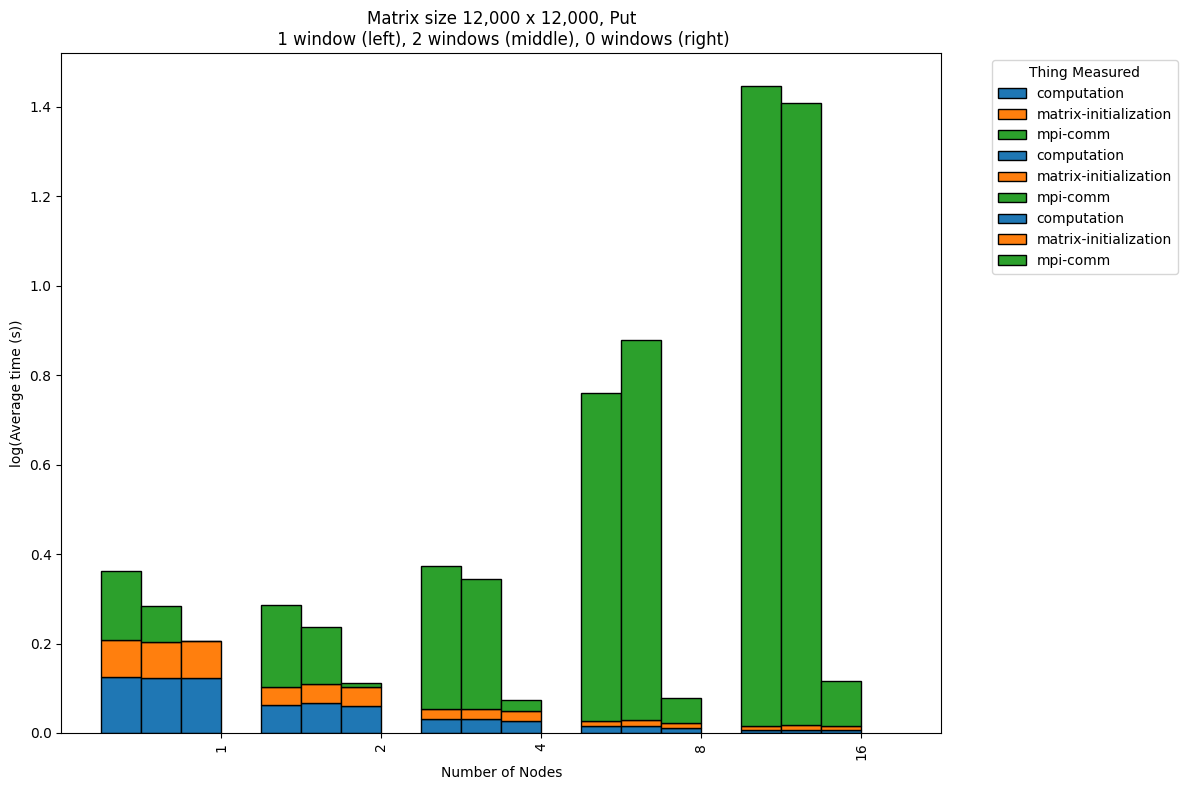

In [18]:
pivot_1_win = df_1_win.pivot(index='nodes', columns='what', values='time')
pivot_2_win = df_2_win.pivot(index='nodes', columns='what', values='time')
pivot_0_win = df_0_win.pivot(index='nodes', columns='what', values='time')

# Make 3 stackbar plots
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

pivot_1_win.plot(kind='bar', stacked=True, ax=ax, width=0.25, position=3, edgecolor='black')
pivot_2_win.plot(kind='bar', stacked=True, ax=ax, width=0.25, position=2, edgecolor='black')
pivot_0_win.plot(kind='bar', stacked=True, ax=ax, width=0.25, position=1, edgecolor='black')


plt.xlim(-1, 4.5)
plt.xlabel('Number of Nodes')
plt.ylabel('log(Average time (s))')
plt.title('Matrix size 12,000 x 12,000, Put\n 1 window (left), 2 windows (middle), 0 windows (right)')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()